In [38]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/zack/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'types', 'unique', 'datetime', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [39]:
from pandas import *

In [40]:
!ls

4-1-2017_12:49:51	    barGraph_win_count16.pdf
barGraph_extinctTime16.pdf  data_parsing.ipynb


In [41]:
# winner[Random Player]
#       [Well Mixed]
winner_16 = [[{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}],
          [{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}]]
winner_32 = [[{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}],
          [{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}]]
winner_64 = [[{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}],
          [{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}]]
#extinct_time[Random Player]
#            [Well Mixed]
extinct_time_16 = [[[],[]],[[],[]]]
extinct_time_32 = [[[],[]],[[],[]]]
extinct_time_32 = [[[],[]],[[],[]]]

In [42]:
"""
This loops through the data and gets the winners
then saves that winner into the winner dictionary
"""
for i in range(500):
    data=read_csv("4-1-2017_12:49:51/data_"+str(i)+".csv")
    i = int(list(data['Well Mixed'])[0])
    j = int(list(data['Random'])[0])
    if (list(data['Size'])[0] == 16):
        extinct_time_16[i][j].append(size(data['R']))
        winner_16[i][j]['R'] += int(list(data['R'])[-1] > 0)
        winner_16[i][j]['P'] += int(list(data['P'])[-1] > 0)
        winner_16[i][j]['S'] += int(list(data['S'])[-1] > 0)
        winner_16[i][j]['M'] += int(list(data['M'])[-1] > 0)
    elif (list(data['Size'])[0] == 32):
        extinct_time_32[i][j].append(size(data['R']))
        winner_32[i][j]['R'] += int(list(data['R'])[-1] > 0)
        winner_32[i][j]['P'] += int(list(data['P'])[-1] > 0)
        winner_32[i][j]['S'] += int(list(data['S'])[-1] > 0)
        winner_32[i][j]['M'] += int(list(data['M'])[-1] > 0)
    elif (list(data['Size'])[0] == 64):
        extinct_time_64[i][j].append(size(data['R']))
        winner_64[i][j]['R'] += int(list(data['R'])[-1] > 0)
        winner_64[i][j]['P'] += int(list(data['P'])[-1] > 0)
        winner_64[i][j]['S'] += int(list(data['S'])[-1] > 0)
        winner_64[i][j]['M'] += int(list(data['M'])[-1] > 0)

In [44]:
winner_16

[[{'M': 0, 'P': 30, 'R': 49, 'S': 46}, {'M': 27, 'P': 31, 'R': 28, 'S': 39}],
 [{'M': 0, 'P': 36, 'R': 41, 'S': 48}, {'M': 34, 'P': 29, 'R': 30, 'S': 32}]]

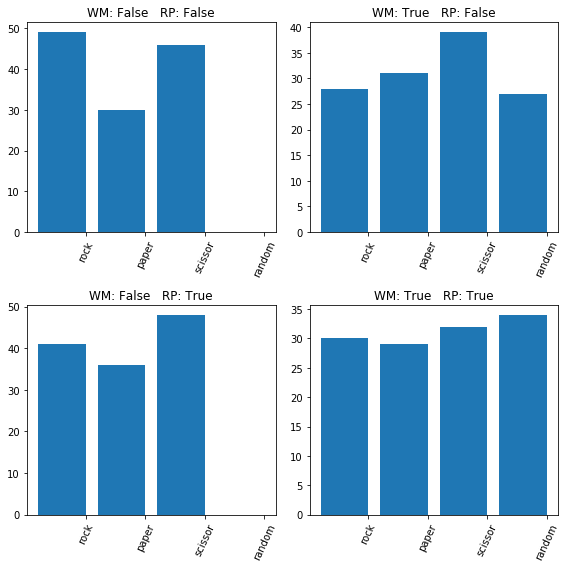

In [46]:
N=['R','P','S','M']
k=1
figsize(8,8)
for i in range(2):
    for j in range(2):
        L=[]
        for n in N:
            L.append(winner_16[i][j][n])
        subplot(2,2,k)
        bar([1,2,3,4],L)
        xticks([1.4,2.4,3.4,4.4],['rock','paper','scissor','random'],rotation=65)
        title("WM: " + str(bool(j)) + "   RP: " + str(bool(i)))
        k=k+1
tight_layout()
savefig("barGraph_win_count16.pdf")

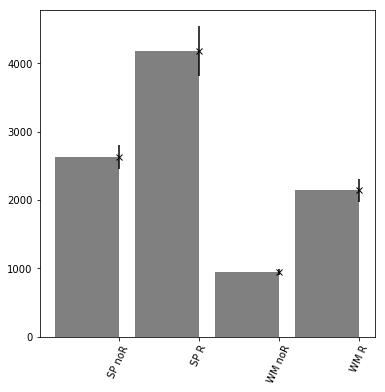

In [20]:
figure(figsize=[6,6])
extinct_time_16
E=[]
S=[]
for i in range(2):
    for j in range(2):
        E.append(mean(extinct_time_16[i][j])*100)
        S.append(std(numpy.array(extinct_time_16[i][j])*100)/float(sqrt(len(extinct_time_16[i][j]))))
        
bar([1,2,3,4],E,color=(0.5,0.5,0.5))
errorbar([1.4,2.4,3.4,4.4],E,S,fmt="xk")
xticks([1.4,2.4,3.4,4.4],["SP noR","SP R","WM noR","WM R"],rotation=65)
savefig("barGraph_extinctTime16.pdf")